In [49]:
#=============================================================
# METR 4523 - HW #1 Problem 3
# Spring 2023
# This is the template of a Python script you can use to calculate
# the change in the zonal-mean temperatures for HW #1, Problem #3.
#=============================================================

#=============================================================
# Import the necessary modules.
#=============================================================
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

#=============================================================
# You will load each data file using the netCDF4 module.
# The time dimension for each file is the YEAR. That means the
# first time element is 1979, the second is 1980, all the way
# to 2021.
# The dimensions of the variable temperature are:
# time x level x latitude x longitude.
#=============================================================
DJFFile = 'Temperature.DJF.1979.2021.nc' # The file to open
#=============================================================
# Load the variables you need. Type 'nc.variables' into the Python
# command line to see what the names of the variables are and their
# dimensions (nc is the 'file handler' for the netCDF file you open).
# An example is below.
#=============================================================
nc = Dataset(DJFFile,'r') #opens the netCDF file
DJF_longitude = nc.variables['lon'][:] # Reads in all longitudes into an array.
DJF_latitude = nc.variables['lat'][:] # Read in all latitude points.
DJF_pressure = nc.variables['level'][:] # Read in all pressure levels.
time = nc.variables['time'][:] # Read in the times (which in this case is years).
          # Note - for DJF, the year 1979 refers to the average of
          # December 1979, January 1980, and February 1980.

#DJFT = nc.variables['temperature'] # This will be a 4-D array of all DJF temperatures. For example,
          # DJFT[10,:,:,:] will be all DJF temperatures at all longitudes,
          # latitudes, and pressure levels for the year 1989.

DJFT = nc.variables['temperature'][:,:,:,:]

units = nc.variables['temperature'].units # Get the units of the variable.

nc.close() # closes the netCDF file.

K


In [35]:
#=============================================================
# Calculate the ZONAL-MEAN temperature for all times, levels, and
# latitudes. That is, take the mean (np.nanmean) of the temperature
# array across the longitude dimension (which dimension of the
# array is that?).
#=============================================================
DJFT_zonalMean = np.nanmean(DJFT,axis=3)
#=============================================================
# Now calculate the climatology for the two time periods separately.
# First, find all elements of the time dimension that are between
# 1979 and 1999. Then, take the MEAN (np.nanmean) over those
# elements ONLY in the time dimension.
# Period 1 is 1979-2000. Period 2 is 2001 - 2021.
# An example is below.
#=============================================================
period1 = np.where((time>=1979) & (time<=2000))[0] # finds the indices where this is true
DJF_Mean_Period1 = np.nanmean(DJFT_zonalMean[period1,:,:],axis=0) #

period2 = np.where((time>=2000) & (time<=2021))[0]
DJF_Mean_Period2 = np.nanmean(DJFT_zonalMean[period2,:,:],axis=0) #

#=============================================================
# Now do the period difference:
# DJF_Diff = period2-period1
#=============================================================

DJF_Diff = DJF_Mean_Period2 - DJF_Mean_Period1 #This is the variable you will contour. It should be
             #a 2-D variable (pressure x latitude)

print(DJF_Diff.shape)

(23, 61)


In [44]:
File = 'Temperature.JJA.1979.2021.nc' # The file to open
nc = Dataset(File,'r') #opens the netCDF file
JJA_longitude = nc.variables['lon'][:] # Reads in all longitudes into an array.
JJA_latitude = nc.variables['lat'][:] # Read in all latitude points.
JJA_pressure = nc.variables['level'][:] # Read in all pressure levels.
time = nc.variables['time'][:] # Read in the times (which in this case is years).
JJAT = nc.variables['temperature'][:]
units = nc.variables['temperature'].units # Get the units of the variable.
nc.close() # closes the netCDF file.

JJAT_zonalMean = np.nanmean(JJAT,axis=3)
period1 = np.where((time>=1979) & (time<=2000))[0] # finds the indices where this is true
JJAT_Mean_Period1 = np.nanmean(JJAT_zonalMean[period1,:,:],axis=0) #

period2 = np.where((time>=2000) & (time<=2021))[0]
JJAT_Mean_Period2 = np.nanmean(JJAT_zonalMean[period2,:,:],axis=0) #

JJAF_Diff = JJAT_Mean_Period2 - JJAT_Mean_Period1 #This is the variable you will contour. It should be
             #a 2-D variable (pressure x latitude)
print(JJAF_Diff.shape)

(23, 61)


In [45]:
print("DJF_Diff:")
print(DJF_Diff)

print("\nJJAF_Diff:")
print(JJAF_Diff)

DJF_Diff:
[[-2.05831502 -2.07886782 -2.04701726 ... -1.24277442 -1.21662414
  -1.20922556]
 [-5.3716707  -5.31695213 -5.17002238 ... -1.62240495 -1.49427938
  -1.45150208]
 [-7.32446429 -7.23756945 -7.04983319 ... -2.57177572 -2.52437088
  -2.52095272]
 ...
 [ 1.3074994   1.46790693  1.70659345 ... -0.05613573 -0.20261898
  -0.09853269]
 [ 1.98790988  2.12883304  2.34021384 ...  0.03282985 -0.20559279
  -0.09870525]
 [ 1.99403581  1.88685995  2.26517757 ...  0.10521801 -0.20882473
  -0.09913665]]

JJAF_Diff:
[[-2.2559775  -2.27107903 -2.32493702 ...  4.65336335  4.86626561
   4.92672651]
 [-3.43191482 -3.43752056 -3.38943737 ... -0.84503745 -0.68008688
  -0.62535069]
 [-3.59243214 -3.57682812 -3.50004154 ... -5.7919789  -5.75972829
  -5.74471677]
 ...
 [ 0.9398106   0.91590442  0.86529309 ...  0.1449673   0.04247432
   0.0813388 ]
 [ 0.72594405  0.76758948  0.73604487 ...  0.15164535  0.04322024
   0.08124487]
 [ 0.03493999  0.03749239  0.0857196  ...  0.1459136   0.043747
   0.0826537

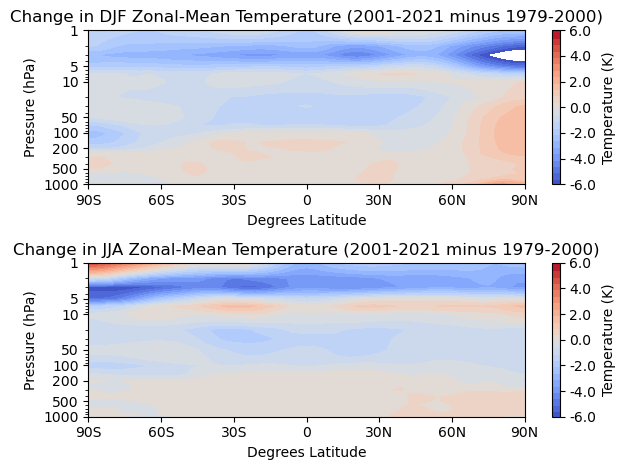

In [52]:
cmin = -6; cmax = 6.1; cint = 0.5
clevs = np.round(np.arange(cmin,cmax,cint),1)
cmap = 'coolwarm' #Choose your own colormap for the shaded contours.

fig = plt.figure()
ax = fig.add_subplot(211) # First of two subplots.
DJF_x,DJF_y = np.meshgrid(DJF_latitude,DJF_pressure) # Needed to contour.

cs = ax.contourf(DJF_x,DJF_y, DJF_Diff, cmap=cmap, levels=clevs)
ax.set_xlim([-90,90])
ax.set_xticks(np.arange(-90,91,30))
ax.set_xticklabels(['90S','60S','30S','0','30N','60N','90N'])

ax.set_yscale('log') # Sets up the y-axis to be a log scale
ax.set_ylim([1,1000])
ax.set_yticks([1,5,10,50,100,200,500,1000])
ax.set_yticklabels([1,5,10,50,100,200,500,1000])
ax.invert_yaxis() # Inverts the y-axis.

cbar = fig.colorbar(cs)
cbar.ax.set_ylabel("Temperature (K)") # Label with the proper units.

cbar.set_ticks(clevs[::4])
cbar.set_ticklabels(clevs[::4])
cbar.solids.set_edgecolor('face')

ax.set_title('Change in DJF Zonal‐Mean Temperature (2001‐2021 minus 1979‐2000)')
ax.set_xlabel('Degrees Latitude')
ax.set_ylabel('Pressure (hPa)')

## 
ax = fig.add_subplot(212) # Second of two subplots

JJA_x,JJA_y = np.meshgrid(JJA_latitude,JJA_pressure) # Needed to contour.
JJA_cs = ax.contourf(JJA_x,JJA_y, JJAF_Diff, cmap=cmap, levels=clevs)
ax.set_xlim([-90,90])
ax.set_xticks(np.arange(-90,91,30))
ax.set_xticklabels(['90S','60S','30S','0','30N','60N','90N'])
ax.set_yscale('log') # Sets up the y-axis to be a log scale
ax.set_ylim([1,1000])
ax.set_yticks([1,5,10,50,100,200,500,1000])
ax.set_yticklabels([1,5,10,50,100,200,500,1000])
ax.invert_yaxis() # Inverts the y-axis.
cbar = fig.colorbar(JJA_cs)
cbar.ax.set_ylabel("Temperature (K)") # Label with the proper units.

cbar.set_ticks(clevs[::4])
cbar.set_ticklabels(clevs[::4])
cbar.solids.set_edgecolor('face')

#=============================================================
# Add an appropriate title and label the x- and y-axes.
#=============================================================
ax.set_title('Change in JJA Zonal‐Mean Temperature (2001‐2021 minus 1979‐2000)')
ax.set_xlabel('Degrees Latitude')
ax.set_ylabel('Pressure (hPa)')

plt.tight_layout()
plt.savefig('YOURFILENAMEWITHFULLPATH.png',dpi=400)